# 读取数据

In [1]:
import pandas as pd
df = pd.read_excel('股票客户流失.xlsx')
df.head()

,账户资金（元）,最后一次交易距今时间（天）,上月交易佣金（元）,累计交易佣金（元）,本券商使用时长（年）,是否流失
0,22686.5,297,149.25,2029.85,0,0
1,190055.0,42,284.75,3889.50,2,0
2,29733.5,233,269.25,2108.15,0,1
3,185667.5,44,211.50,3840.75,3,0
4,33648.5,213,353.50,2151.65,0,1


# 划分特征变量和目标变量

In [2]:
X = df.drop(columns='是否流失') 
y = df['是否流失']   

# 划分训练集和测试集

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train.head()

,账户资金（元）,最后一次交易距今时间（天）,上月交易佣金（元）,累计交易佣金（元）,本券商使用时长（年）
1814,43251.5,192,98.50,2258.35,0
5946,304449.5,22,369.50,5160.55,3
3881,441357.5,9,325.75,6681.75,5
2389,587076.5,2,427.25,8300.85,5
3676,204027.5,39,352.00,4044.75,2


# 模型搭建

In [4]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

# 查看测试集预测结果

In [5]:
y_pred = model.predict(X_test)
print(y_pred[0:100])

[0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1]


In [6]:
a = pd.DataFrame()
a['预测值'] = list(y_pred)
a['实际值'] = list(y_test)
a.head()

,预测值,实际值
0,0,0
1,0,0
2,0,0
3,0,1
4,0,0


# 查看预测准确度

In [15]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print(score)

0.7977288857345636


In [16]:
model.score(X_test, y_test)

0.7977288857345636

# 查看预测概率

In [10]:
y_pred_proba = model.predict_proba(X_test)  
y_pred_proba[0:5]

array([[0.82041491, 0.17958509],
       [0.84029613, 0.15970387],
       [0.79819342, 0.20180658],
       [0.62989192, 0.37010808],
       [0.61636611, 0.38363389]])

In [11]:
a = pd.DataFrame(y_pred_proba, columns=['不流失概率', '流失概率'])
a.head()

,不流失概率,流失概率
0,0.820415,0.179585
1,0.840296,0.159704
2,0.798193,0.201807
3,0.629892,0.370108
4,0.616366,0.383634


In [12]:
y_pred_proba[:,1]

array([0.17958509, 0.15970387, 0.20180658, ..., 0.04220544, 0.09782449,
       0.63586739])

# 获取逻辑回归系数

In [13]:
model.coef_

array([[ 2.41952469e-05,  8.16881490e-03,  1.04320950e-02,
        -2.54894468e-03, -1.10120609e-04]])

In [14]:
model.intercept_

array([-1.43393291e-06])

In [17]:
import numpy as np
for i in range(5):
    print(1 / (1 + np.exp(-(np.dot(X_test.iloc[i], model.coef_.T) + model.intercept_))))

[0.17958509]
[0.15970387]
[0.20180658]
[0.37010808]
[0.38363389]


# 混淆矩阵代码实现

In [21]:
from sklearn.metrics import confusion_matrix
m = confusion_matrix(y_test, y_pred)
print(m)

[[968  93]
 [192 156]]


In [22]:
a = pd.DataFrame(m, index=['0（实际不流失）', '1（实际流失）'], columns=['0（预测不流失）', '1（预测流失）'])
a

,0（预测不流失）,1（预测流失）
0（实际不流失）,968,93
1（实际流失）,192,156


In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1061
           1       0.63      0.45      0.52       348

    accuracy                           0.80      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.78      0.80      0.79      1409



# 用ROC曲线评估客户流失预警模型

### 商业实战中，AUC能达到0.75以上就可以接受，0.85以上则是非常不错的模型

In [24]:
from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve(y_test, y_pred_proba[:,1])

In [29]:
a = pd.DataFrame()
a['阈值'] = list(thres)
a['假警报率'] = list(fpr)
a['命中率'] = list(tpr)
a.head().append(a.tail())

,阈值,假警报率,命中率
0,1.930369,0.000000,0.000000
1,0.930369,0.000000,0.002874
2,0.867342,0.000000,0.034483
3,0.864187,0.001885,0.034483
4,0.857303,0.001885,0.040230
373,0.034940,0.918944,0.994253
374,0.034861,0.918944,0.997126
375,0.032088,0.932139,0.997126
376,0.032016,0.932139,1.000000
377,0.023578,1.000000,1.000000


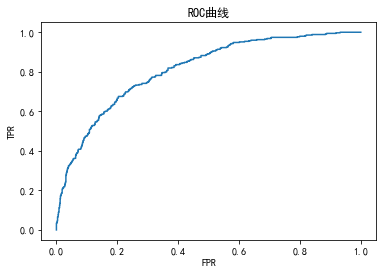

In [30]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.plot(fpr, tpr)
plt.title('ROC曲线')  
plt.xlabel('FPR') 
plt.ylabel('TPR') 
plt.show()

In [31]:
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_test, y_pred_proba[:,1])
score

0.8103854528908967

# 补充知识点：阈值的选取方法

In [32]:
a = pd.DataFrame(y_pred_proba, columns=['分类为0概率', '分类为1概率'])
a = a.sort_values('分类为1概率', ascending=False)
a.head(15)

,分类为0概率,分类为1概率
326,0.069631,0.930369
366,0.085373,0.914627
662,0.092923,0.907077
1154,0.105118,0.894882
1036,0.105906,0.894094
1093,0.111303,0.888697
1164,0.115550,0.884450
891,0.116594,0.883406
437,0.123060,0.876940
1153,0.127293,0.872707


# 用KS曲线评估客户流失预警模型

### ks值小于0.2，模型区分能力弱

### ks值介于0.2-0.3之间，模型有一定区分能力

### ks值介于0.3-0.5之间，模型区分能力强

### ks值大于0.75，模型有异常

### 商业实战中，ks值在0.2-0.3之间就可以接受

In [34]:
from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve(y_test, y_pred_proba[:,1])

In [35]:
a = pd.DataFrame() 
a['阈值'] = list(thres)
a['假警报率'] = list(fpr)
a['命中率'] = list(tpr)
a.head()

,阈值,假警报率,命中率
0,1.930369,0.000000,0.000000
1,0.930369,0.000000,0.002874
2,0.867342,0.000000,0.034483
3,0.864187,0.001885,0.034483
4,0.857303,0.001885,0.040230


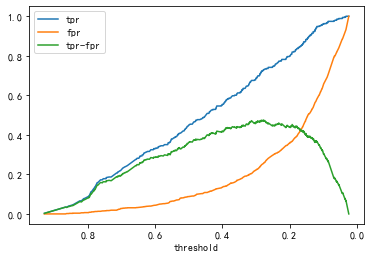

In [38]:
# 阈值第一行为预测概率最大值+1，无意义，因此切片去掉
plt.plot(thres[1:], tpr[1:])
plt.plot(thres[1:], fpr[1:])
plt.plot(thres[1:], tpr[1:] - fpr[1:])
plt.xlabel('threshold')
plt.legend(['tpr', 'fpr', 'tpr-fpr'])
plt.gca().invert_xaxis() # gca获取坐标轴信息，invert_xaxis反转x轴
plt.show()

In [39]:
max(tpr - fpr)

0.4744656418256471

# 补充知识点：获取ks值对应的阈值

In [40]:
a['TPR-FPR'] = a['命中率'] - a['假警报率']
a.head()

,阈值,假警报率,命中率,TPR-FPR
0,1.930369,0.000000,0.000000,0.000000
1,0.930369,0.000000,0.002874,0.002874
2,0.867342,0.000000,0.034483,0.034483
3,0.864187,0.001885,0.034483,0.032598
4,0.857303,0.001885,0.040230,0.038345


In [41]:
max(a['TPR-FPR'])

0.4744656418256471

In [42]:
a[a['TPR-FPR'] == max(a['TPR-FPR'])]

,阈值,假警报率,命中率,TPR-FPR
224,0.27769,0.255419,0.729885,0.474466
